In [10]:
import re
import pandas as pd

# Lee el archivo de texto
with open('results2.txt', 'r') as file:
    text = file.read()

# Define el patrón regex para extraer los datos
pattern = re.compile(
    r"Epoch \d+, Accuracy: (?P<accuracy>\d+\.\d+), Loss: (?P<loss>\d+\.\d+), Validation Accuracy: (?P<val_accuracy>\d+\.\d+), Validation Loss: (?P<val_loss>\d+\.\d+)"
)

# Encuentra todos los matches en el texto
matches = pattern.findall(text)

# Convierte los datos extraídos a un DataFrame
data = {
    "Accuracy": [float(match[0]) for match in matches],
    "Loss": [float(match[1]) for match in matches],
    "Validation Accuracy": [float(match[2]) for match in matches],
    "Validation Loss": [float(match[3]) for match in matches]
}

df = pd.DataFrame(data)


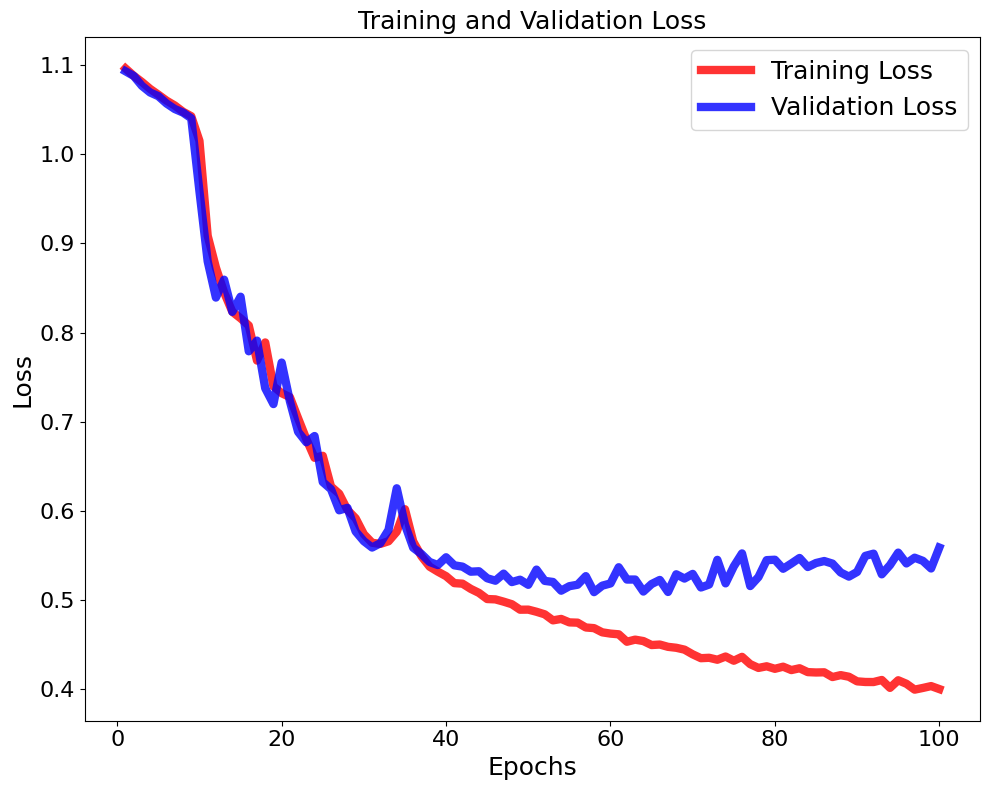

In [11]:
import matplotlib.pyplot as plt

# Configuración de estilo
lw = 6
s = 18  # Tamaño de los títulos y leyenda
a = 0.8
ct = "red"
ca = "blue"
axis_fontsize = 16  # Tamaño de la fuente de los números en los ejes

# Crear una figura con un solo subplot
fig, ax1 = plt.subplots(figsize=(10, 8))

# Gráfico de Pérdida
ax1.plot(df.index + 1, df['Loss'], label='Training Loss', linewidth=lw, color=ct, alpha=a)
ax1.plot(df.index + 1, df['Validation Loss'], label='Validation Loss', linewidth=lw, color=ca, alpha=a)
ax1.set_xlabel('Epochs', fontsize=s)
ax1.set_ylabel('Loss', fontsize=s)
ax1.set_title('Training and Validation Loss', fontsize=s)
ax1.legend(fontsize=s)

# Hacer los números en los ejes más grandes
ax1.tick_params(axis='both', which='major', labelsize=axis_fontsize)

# Ajustar el layout y guardar la imagen
plt.tight_layout()
plt.savefig('classical_model_3classes_frozen.png')
plt.show()

In [7]:
# Extract the coordinates of the training and validation loss lines
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from skimage import color
from skimage.measure import label, regionprops

# Load the image
img = mpimg.imread("test.jpg")

# Convert the image to grayscale
gray_img = color.rgb2gray(img)

# Find contours
labeled_img = label(gray_img < 0.5)

# Extract regions
regions = regionprops(labeled_img)

# Initialize lists to store the coordinates
train_loss_coords = []
val_loss_coords = []

# Define color range for train loss (blue) and validation loss (orange)
train_loss_color = (0.0, 0.0, 1.0)  # Blue in RGB
val_loss_color = (1.0, 0.65, 0.0)   # Orange in RGB

# Iterate over regions to identify the lines
for region in regions:
    # Extract the coordinates
    coords = region.coords
    for coord in coords:
        y, x = coord
        pixel_value = img[y, x, :]
        
        # Check if the pixel color matches the train loss color
        if np.allclose(pixel_value, train_loss_color, atol=0.1):
            train_loss_coords.append((x, y))
        
        # Check if the pixel color matches the validation loss color
        if np.allclose(pixel_value, val_loss_color, atol=0.1):
            val_loss_coords.append((x, y))

# Sort the coordinates by x value (epoch)
train_loss_coords = sorted(train_loss_coords)
val_loss_coords = sorted(val_loss_coords)

# Convert coordinates to epochs and loss values
train_loss_epochs = [x[0] for x in train_loss_coords]
train_loss_values = [x[1] for x in train_loss_coords]
val_loss_epochs = [x[0] for x in val_loss_coords]
val_loss_values = [x[1] for x in val_loss_coords]

# Normalize the loss values based on the image height (assuming the y axis starts at the top)
image_height = img.shape[0]
train_loss_values = [1 - (y / image_height) for y in train_loss_values]
val_loss_values = [1 - (y / image_height) for y in val_loss_values]

(train_loss_epochs, train_loss_values), (val_loss_epochs, val_loss_values)

(([], []), ([], []))